In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib

import pandas as pd
import numpy as np
import seaborn as sns
import itertools

import sys
sys.path.append('../data/tecantaloupe/')

from growth.plate_spec import PlateSpec
from growth.plate_time_course_parser import SavageLabM1000Excel
from matplotlib import pyplot as plt

import seaborn as sns
from utils import *
import os

matplotlib.rcParams.update({'font.size': 30})

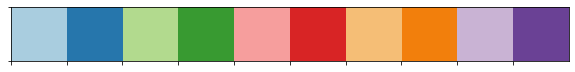

In [2]:
sns.palplot(qual_palette)

In [37]:
def prepAndNormalize(ps,timecourse,cutoffTime):
    blanked = timecourse.blank(n_skip=0,n_av=3)
    smoothed = blanked.smooth()
    data = smoothed.data_for_label('abs600')
    yld = smoothed.GrowthYieldCutoff(cutoffTime,density_label='abs600')
    name2well = ps.name_to_well_mapping()

    yld = pd.DataFrame(yld, index=['yield']).T
    grouped_yld = yld.groupby(ps.well_to_name_mapping())
    mean_yield = grouped_yld.mean()
    
    normalized_yld = yld / mean_yield.loc['bw+pFE-sfGFP']
    normalized_mean_yld = normalized_yld.groupby(ps.well_to_name_mapping()).mean()
    normalized_std_yld = normalized_yld.groupby(ps.well_to_name_mapping()).std()
    ylds = normalized_yld.copy()
    ylds['name'] = [ps.well_to_name_mapping()[x] for x in ylds.index]
    return( (ylds,normalized_mean_yld,normalized_std_yld,grouped_yld) )

/usr/local/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)
../data/tecantaloupe/growth/plate_time_course_parser.py:80: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return clipped_df.convert_objects(convert_numeric=True)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation h

pval for comparison of CAF+pFE-DAB2_wt and CAF+pFE-DC351 is: 1.05E-08, tval is: 5.43E+01
pval for comparison of CAF+pFE-DAB2_wt and CAF+pFE-DD353 is: 3.06E-11, tval is: 1.44E+02
pval for comparison of CAF+pFE-DAB2_wt and CAF+pFE-DAB2+dHis1 is: 3.68E-08, tval is: 4.40E+01
pval for comparison of CAF+pFE-DAB2_wt and CAF+pFE-DAB2+dCys1 is: 3.54E-08, tval is: 4.43E+01


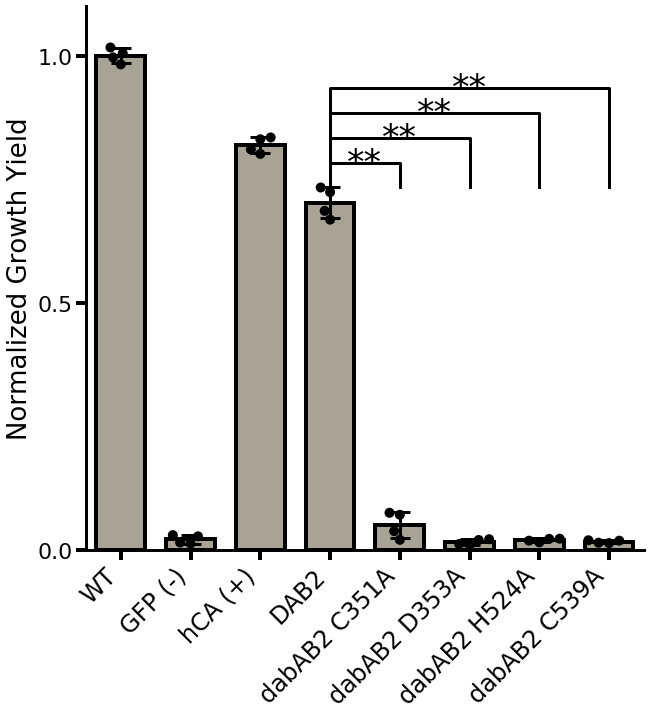

In [40]:
fig,ax = plt.subplots(figsize=(10,10))

# PlateSpec defined in CSV for easy editing
ps = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_02_07_operon1CAFreeKnockInGrowth_metalKO_nice.csv')
parser = SavageLabM1000Excel()
timecourse = parser.ParseFromFilename('../data/tecantaloupe/growth/data/2018_02_09_CAFree_operon1_rescue_experiment_metal_KO_later.xlsx')
yld,normalized_mean_yld,normalized_std_yld,grouped_yld=prepAndNormalize(ps,timecourse,24)

#     print(normalized_mean_yld)

ps2 = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_03_23_operon1CAFreeKnockInGrowth_metalandproton_nice.csv')
parser2 = SavageLabM1000Excel()
timecourse2 = parser2.ParseFromFilename('../data/tecantaloupe/growth/data/2018_03_24_CAFree_DAB2_protonWire.xlsx')
yld2, normalized_mean_yld2,normalized_std_yld2,grouped_yld2=prepAndNormalize(ps2,timecourse2,24)

#     print(data)
to_plot = [
    ('bw+pFE-sfGFP', 'WT'),
    ('CAF+pFE-sfGFP', 'GFP (-)'),
    ('CAF+pFE-HCA2', 'hCA (+)'),
    ('CAF+pFE-DAB2_wt', 'DAB2'),
    ('CAF+pFE-DC351', 'dabAB2 C351A'),
    ('CAF+pFE-DD353', 'dabAB2 D353A'),
    ('CAF+pFE-DAB2+dHis1', 'dabAB2 H524A'),
    ('CAF+pFE-DAB2+dCys1', 'dabAB2 C539A'),
]

to_add=[
    'CAF+pFE-DC351',
    'CAF+pFE-DD353',
]

to_test2 = [
    ('CAF+pFE-DAB2_wt', 'CAF+pFE-DC351',3,4),
    ('CAF+pFE-DAB2_wt', 'CAF+pFE-DD353',3,5),
]
to_test = [
    ('CAF+pFE-DAB2_wt', 'CAF+pFE-DAB2+dHis1',3,6),
    ('CAF+pFE-DAB2_wt', 'CAF+pFE-DAB2+dCys1',3,7),
]

for label in to_add:
    m =normalized_mean_yld2.loc[label]
    normalized_mean_yld.ix[label]=m
    normalized_std_yld.ix[label]=normalized_std_yld2.loc[label]
    yld = yld.append(yld2[yld2.name==label],ignore_index=True)
#     print(normalized_mean_yld)
# print(yld)

labels = [name for label, name in to_plot]
ylds = [normalized_mean_yld.loc[t[0]][0] for t in to_plot]
stds = [normalized_std_yld.loc[t[0]][0] for t in to_plot]

xs = np.arange(len(ylds))
plt.bar(xs, ylds, yerr=stds, color=greyish, align='center', ecolor='k', width=0.7, edgecolor='k',
        linewidth=4, capsize=10, error_kw={'capsize': 10, 'capthick': 3, 'elinewidth': 3})



i=0

for test1,test2,x1,x2 in to_test2:
    i+=1
    y=max(ylds[x1]+stds[x1],ylds[x2]+stds[x2])
    h=i/20
#     print(grouped_yld.get_group(test[0])['yield'])
    tval,pval = ttest_ind(grouped_yld2.get_group(test1)['yield'],grouped_yld2.get_group(test2)['yield'])
    pval_corrected=pval*(len(to_test)+len(to_test2))
#     print(pval)
    print('pval for comparison of %s and %s is: %.2E, tval is: %.2E'%(test1,test2,pval_corrected,tval))
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, color='k')
    
    sig_str=''
    va=''
    if (pval_corrected<0.0005):
        sig_str='**'
        va='center'
    elif (pval_corrected<0.05):
        sig_str='*'
        va='center'
    else:
        sig_str='n.s.'
        va='bottom'
    
    plt.text((x1+x2)*.5, y+h, sig_str, ha='center', va=va, color='k',fontsize=35)

sns.swarmplot(x='name',y='yield',data=yld,color='k', size=10, ax=ax, order=[t[0] for t in to_plot])

for test1,test2,x1,x2 in to_test:
    i+=1
    y=max(ylds[x1]+stds[x1],ylds[x2]+stds[x2])
    h=i/20
#     print(grouped_yld.get_group(test[0])['yield'])
    tval,pval = ttest_ind(grouped_yld.get_group(test1)['yield'],grouped_yld.get_group(test2)['yield'])
    pval_corrected=pval*(len(to_test)+len(to_test2))
#     print(pval)
    print('pval for comparison of %s and %s is: %.2E, tval is: %.2E'%(test1,test2,pval_corrected,tval))
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, color='k')
    
    sig_str=''
    va=''
    if (pval_corrected<0.0005):
        sig_str='**'
        va='center'
    elif (pval_corrected<0.05):
        sig_str='*'
        va='center'
    else:
        sig_str='n.s.'
        va='bottom'
    
    plt.text((x1+x2)*.5, y+h, sig_str, ha='center', va=va, color='k',fontsize=35)
    

    
    

plt.ylabel('Normalized Growth Yield', fontsize=26)
plt.xlabel('')


plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks([0, 0.5, 1.0], fontsize=22)
plt.ylim(0.0, 1.1)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

plt.savefig('fig4/fig4A_pValues.eps',format='eps',bbox_inches='tight')
plt.show()

/usr/local/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)
../data/tecantaloupe/growth/plate_time_course_parser.py:80: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return clipped_df.convert_objects(convert_numeric=True)
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:44: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation h

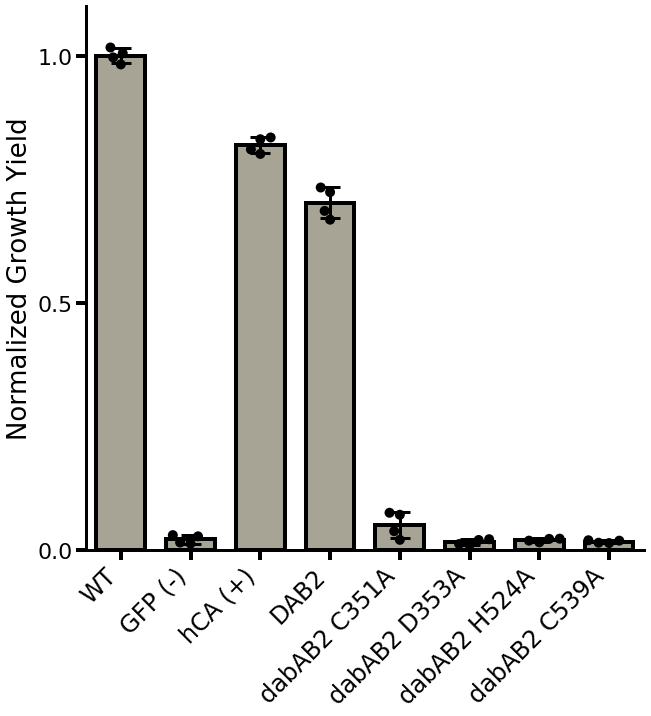

In [42]:
fig,ax = plt.subplots(figsize=(10,10))

# PlateSpec defined in CSV for easy editing
ps = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_02_07_operon1CAFreeKnockInGrowth_metalKO_nice.csv')
parser = SavageLabM1000Excel()
timecourse = parser.ParseFromFilename('../data/tecantaloupe/growth/data/2018_02_09_CAFree_operon1_rescue_experiment_metal_KO_later.xlsx')
yld,normalized_mean_yld,normalized_std_yld,grouped_yld=prepAndNormalize(ps,timecourse,24)

#     print(normalized_mean_yld)

ps2 = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_03_23_operon1CAFreeKnockInGrowth_metalandproton_nice.csv')
parser2 = SavageLabM1000Excel()
timecourse2 = parser2.ParseFromFilename('../data/tecantaloupe/growth/data/2018_03_24_CAFree_DAB2_protonWire.xlsx')
yld2, normalized_mean_yld2,normalized_std_yld2,grouped_yld2=prepAndNormalize(ps2,timecourse2,24)

#     print(data)
to_plot = [
    ('bw+pFE-sfGFP', 'WT'),
    ('CAF+pFE-sfGFP', 'GFP (-)'),
    ('CAF+pFE-HCA2', 'hCA (+)'),
    ('CAF+pFE-DAB2_wt', 'DAB2'),
    ('CAF+pFE-DC351', 'dabAB2 C351A'),
    ('CAF+pFE-DD353', 'dabAB2 D353A'),
    ('CAF+pFE-DAB2+dHis1', 'dabAB2 H524A'),
    ('CAF+pFE-DAB2+dCys1', 'dabAB2 C539A'),
]

to_add=[
    'CAF+pFE-DC351',
    'CAF+pFE-DD353',
]

to_test2 = [
    ('CAF+pFE-DAB2_wt', 'CAF+pFE-DC351',3,4),
    ('CAF+pFE-DAB2_wt', 'CAF+pFE-DD353',3,5),
]
to_test = [
    ('CAF+pFE-DAB2_wt', 'CAF+pFE-DAB2+dHis1',3,6),
    ('CAF+pFE-DAB2_wt', 'CAF+pFE-DAB2+dCys1',3,7),
]

for label in to_add:
    m =normalized_mean_yld2.loc[label]
    normalized_mean_yld.ix[label]=m
    normalized_std_yld.ix[label]=normalized_std_yld2.loc[label]
    yld = yld.append(yld2[yld2.name==label],ignore_index=True)
#     print(normalized_mean_yld)
# print(yld)

labels = [name for label, name in to_plot]
ylds = [normalized_mean_yld.loc[t[0]][0] for t in to_plot]
stds = [normalized_std_yld.loc[t[0]][0] for t in to_plot]

xs = np.arange(len(ylds))
plt.bar(xs, ylds, yerr=stds, color=greyish, align='center', ecolor='k', width=0.7, edgecolor='k',
        linewidth=4, capsize=10, error_kw={'capsize': 10, 'capthick': 3, 'elinewidth': 3})



i=0

# for test1,test2,x1,x2 in to_test2:
#     i+=1
#     y=max(ylds[x1]+stds[x1],ylds[x2]+stds[x2])
#     h=i/20
# #     print(grouped_yld.get_group(test[0])['yield'])
#     tval,pval = ttest_ind(grouped_yld2.get_group(test1)['yield'],grouped_yld2.get_group(test2)['yield'])
#     pval_corrected=pval*(len(to_test)+len(to_test2))
# #     print(pval)
#     print('pval for comparison of %s and %s is: %.2E, tval is: %.2E'%(test1,test2,pval_corrected,tval))
#     plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, color='k')
    
#     sig_str=''
#     va=''
#     if (pval_corrected<0.0005):
#         sig_str='**'
#         va='center'
#     elif (pval_corrected<0.05):
#         sig_str='*'
#         va='center'
#     else:
#         sig_str='n.s.'
#         va='bottom'
    
#     plt.text((x1+x2)*.5, y+h, sig_str, ha='center', va=va, color='k',fontsize=35)
    
sns.swarmplot(x='name',y='yield',data=yld,color='k', size=10, ax=ax, order=[t[0] for t in to_plot])

# for test1,test2,x1,x2 in to_test:
#     i+=1
#     y=max(ylds[x1]+stds[x1],ylds[x2]+stds[x2])
#     h=i/20
# #     print(grouped_yld.get_group(test[0])['yield'])
#     tval,pval = ttest_ind(grouped_yld.get_group(test1)['yield'],grouped_yld.get_group(test2)['yield'])
#     pval_corrected=pval*(len(to_test)+len(to_test2))
# #     print(pval)
#     print('pval for comparison of %s and %s is: %.2E, tval is: %.2E'%(test1,test2,pval_corrected,tval))
#     plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, color='k')
    
#     sig_str=''
#     va=''
#     if (pval_corrected<0.0005):
#         sig_str='**'
#         va='center'
#     elif (pval_corrected<0.05):
#         sig_str='*'
#         va='center'
#     else:
#         sig_str='n.s.'
#         va='bottom'
    
#     plt.text((x1+x2)*.5, y+h, sig_str, ha='center', va=va, color='k',fontsize=35)
    

    
    

plt.ylabel('Normalized Growth Yield', fontsize=26)
plt.xlabel('')


plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks([0, 0.5, 1.0], fontsize=22)
plt.ylim(0.0, 1.1)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

plt.savefig('fig4/fig4A_noPvalues.eps',format='eps',bbox_inches='tight')
plt.show()

10.537696418398424
pval for comparison of CAF+DAB2wt and CAF+DAB2C351A is: 3.60E-02
10.537696418398424
pval for comparison of CAF+DAB2wt and CAF+DAB2D353A is: 3.60E-02
10.537696418398424
pval for comparison of CAF+DAB2wt and CAF+DAB2H524A is: 3.60E-02
10.537696418398424
pval for comparison of CAF+DAB2wt and CAF+DAB2C539A is: 3.60E-02


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

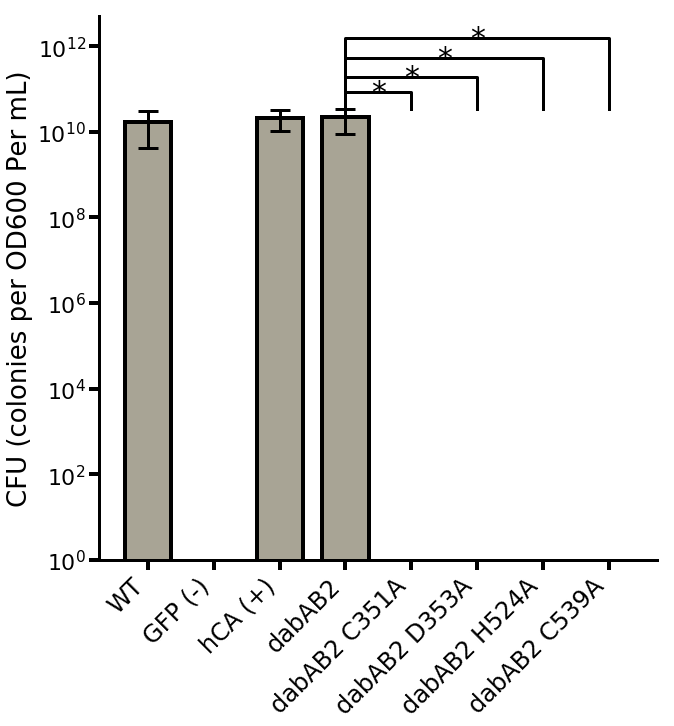

In [5]:
fig,ax = plt.subplots(figsize=(10,10))

inputFile = '../data/2019_02_08_pointMuants_and_Homologs_spotting/2019_02_08_pointMuants_and_Homologs_spotting.xlsx'
rawCounts = pd.read_excel(inputFile,sheet_name='ForAnalysis')
cols=rawCounts.columns
processedCounts = pd.DataFrame()
processedCounts['Strain']=rawCounts['Strain']
# processedCounts['replicate']=rawCounts['replicate']
for col in cols:
    if 'replicate' in col:
        rawCounts[col]=rawCounts[col].astype('float')
        if '(' in col:
            processedCounts[col.rsplit('(')[0]+'(CFU/OD*ml)'] = rawCounts[col]*5*1000/3
cols=rawCounts.columns
toMix = pd.DataFrame()
toMix['Strain']=rawCounts['Strain']
toMix['replicate']=rawCounts['replicate']
for col in cols:
    if 'replicate' in col:
        rawCounts[col]=rawCounts[col].astype('float')
        if '(' in col:
            toMix[col.rsplit('(')[0]+'(CFU/OD*ml)'] = rawCounts[col]*5*1000/3
mixed = toMix[toMix['replicate']==1].merge(toMix[toMix['replicate']>1],how='outer',on='Strain')
mixed=mixed.drop(['replicate_x','replicate_y'],axis=1)
aggregated = pd.DataFrame() 
aggregated['Strain'] = mixed['Strain'] 
aggregated['average'] = mixed.mean(axis=1)
# aggregated['average'] =aggregated['average']+1
aggregated['stdev'] = mixed.std(axis=1)
to_plot = [
    ('BW+sfGFP', 'WT'),
    ('CAF+sfGFP', 'GFP (-)'),
    ('CAF+HCA', 'hCA (+)'),
    ('CAF+DAB2wt', 'dabAB2'),
    ('CAF+DAB2C351A', 'dabAB2 C351A'),
    ('CAF+DAB2D353A', 'dabAB2 D353A'),
    ('CAF+DAB2H524A', 'dabAB2 H524A'),
    ('CAF+DAB2C539A', 'dabAB2 C539A'),
]

to_test = [
    ('CAF+DAB2wt','CAF+DAB2C351A', 3,4),
    ('CAF+DAB2wt','CAF+DAB2D353A', 3,5),
    ('CAF+DAB2wt','CAF+DAB2H524A', 3,6),
    ('CAF+DAB2wt','CAF+DAB2C539A', 3,7),
    
#     ('CAF+pFE-DAB2_wt', 'CAF+pFE-NDH',5,3),
#     ('CAF+pFE-DAB2_wt', 'CAF+pFE-HCA2',5,2),
#     ('CAF+pFE-DAB2_wt', 'CAF+pFE-sfGFP',5,1),
]

labels = [name for label, name in to_plot]
cfus = [aggregated[aggregated['Strain']==x[0]]['average'].values[0] for x in to_plot]
stds = [aggregated[aggregated['Strain']==x[0]]['stdev'].values[0] for x in to_plot]

xs = np.arange(len(cfus))
plt.bar(xs, cfus, yerr=stds, color=greyish, align='center', ecolor='k', width=0.7, edgecolor='k',
        linewidth=4, capsize=10, error_kw={'capsize': 10, 'capthick': 3, 'elinewidth': 3})


# print(grouped_yld)
i=5
for test1,test2,x1,x2 in to_test:
    y=max(cfus[x1]+stds[x1],0)#,ylds[x2]+stds[x2])
    print(np.log10(y))
#     offs = np.logspace(np.log10(y),12.2,num=len(to_test))
#     print(offs)
#     h=offs[i-1]
    h=i*10**10
    group1 = mixed[mixed['Strain']==test1].drop(['Strain'],axis=1).dropna(axis=1).values.ravel()
    group2 = mixed[mixed['Strain']==test2].drop(['Strain'],axis=1).dropna(axis=1).values.ravel()
#     print(grouped_yld.get_group(test[0])['yield'])
    tval,pval = ttest_ind(group1,group2,equal_var=False)
    pval_corrected=pval*len(to_test)
#     print(pval)
    print('pval for comparison of %s and %s is: %.2E'%(test1,test2,pval_corrected))
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, color='k')
    
    sig_str=''
    va=''
    if (pval_corrected<0.0005):
        sig_str='**'
        va='center'
    elif (pval_corrected<0.05):
        sig_str='*'
        va='center'
    else:
        sig_str='n.s.'
        va='bottom'
    
    plt.text((x1+x2)*.5, y+h, sig_str, ha='center', va=va, color='k',fontsize=30)
    i=i*3.1
    
    

plt.ylabel('CFU (colonies per OD600 Per mL)', fontsize=26)

plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks(fontsize=22)
plt.yscale('log')
plt.ylim((1, 5E12))

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
    
plt.savefig('fig4/fig4A_CFU.eps',format='eps',bbox_inches='tight')
plt.show()

In [87]:
fig.artists

[]

pval for comparison of CAF+DAB2wt and CAF+DAB2C351A is: 3.60E-02
pval for comparison of CAF+DAB2wt and CAF+DAB2D353A is: 3.60E-02
pval for comparison of CAF+DAB2wt and CAF+DAB2H524A is: 3.60E-02
pval for comparison of CAF+DAB2wt and CAF+DAB2C539A is: 3.60E-02


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

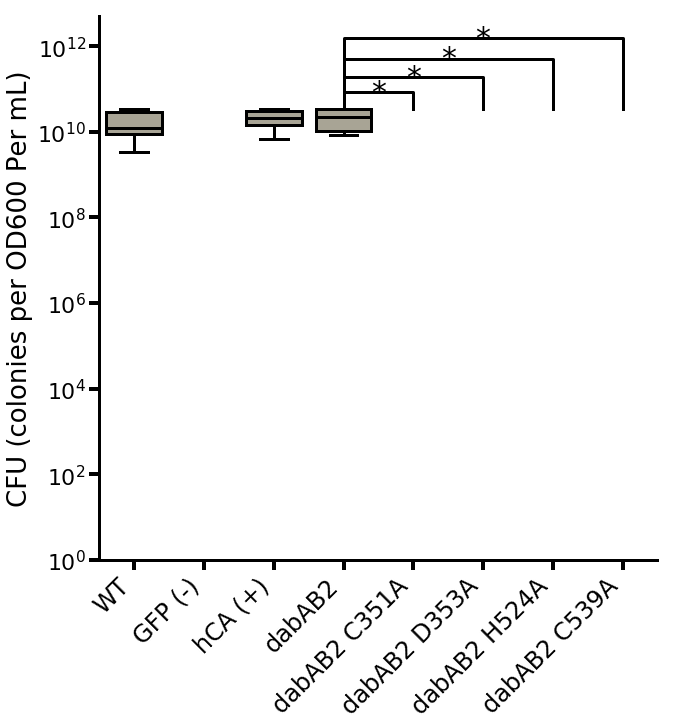

In [96]:
inputFile = '../data/2019_02_08_pointMuants_and_Homologs_spotting/2019_02_08_pointMuants_and_Homologs_spotting.xlsx'
rawCounts = pd.read_excel(inputFile,sheet_name='ForAnalysis')
cols=rawCounts.columns
processedCounts = pd.DataFrame()
processedCounts['Strain']=rawCounts['Strain']
# processedCounts['replicate']=rawCounts['replicate']
for col in cols:
    if 'replicate' in col:
        rawCounts[col]=rawCounts[col].astype('float')
        if '(' in col:
            processedCounts[col.rsplit('(')[0]+'(CFU/OD*ml)'] = rawCounts[col]*5*1000/3
cols=rawCounts.columns
toMix = pd.DataFrame()
toMix['Strain']=rawCounts['Strain']
toMix['replicate']=rawCounts['replicate']
for col in cols:
    if 'replicate' in col:
        rawCounts[col]=rawCounts[col].astype('float')
        if '(' in col:
            toMix[col.rsplit('(')[0]+'(CFU/OD*ml)'] = rawCounts[col]*5*1000/3
mixed = toMix[toMix['replicate']==1].merge(toMix[toMix['replicate']>1],how='outer',on='Strain')
mixed=mixed.drop(['replicate_x','replicate_y'],axis=1)

to_plot = [
    ('BW+sfGFP', 'WT'),
    ('CAF+sfGFP', 'GFP (-)'),
    ('CAF+HCA', 'hCA (+)'),
    ('CAF+DAB2wt', 'dabAB2'),
    ('CAF+DAB2C351A', 'dabAB2 C351A'),
    ('CAF+DAB2D353A', 'dabAB2 D353A'),
    ('CAF+DAB2H524A', 'dabAB2 H524A'),
    ('CAF+DAB2C539A', 'dabAB2 C539A'),
]


order,labels=[list(x) for x in zip(*to_plot)]

molten = mixed.melt(id_vars='Strain')
molten['value']=molten['value']


byStrain = molten.set_index('Strain')
byStrain = byStrain.loc[order]
byStrain['value']=byStrain['value']#+2
fig,ax = plt.subplots(figsize=(10,10))
# sns.swarmplot(x='Strain',y='value',data=molten,size=5,color='k',ax=ax)


sns.boxplot(x=byStrain.index,y='value',data=byStrain,ax=ax,color=greyish,saturation=1, linewidth=3)


for i,artist in enumerate(ax.artists):
    # Set the linecolor on the artist to the facecolor, and set the facecolor to None
    col ='k'
    artist.set_edgecolor(col)

    # Each box has 6 associated Line2D objects (to make the whiskers, fliers, etc.)
    # Loop over them here, and use the same colour as above
    for j in range(i*6,i*6+6):
        line = ax.lines[j]
        line.set_color(col)
        line.set_mfc(col)
        line.set_mec(col)

        
to_test = [
    ('CAF+DAB2wt','CAF+DAB2C351A', 3,4),
    ('CAF+DAB2wt','CAF+DAB2D353A', 3,5),
    ('CAF+DAB2wt','CAF+DAB2H524A', 3,6),
    ('CAF+DAB2wt','CAF+DAB2C539A', 3,7),
    
#     ('CAF+pFE-DAB2_wt', 'CAF+pFE-NDH',5,3),
#     ('CAF+pFE-DAB2_wt', 'CAF+pFE-HCA2',5,2),
#     ('CAF+pFE-DAB2_wt', 'CAF+pFE-sfGFP',5,1),
]
        
# print(grouped_yld)
i=5
for test1,test2,x1,x2 in to_test:
    group1 = byStrain.loc[test1]['value'].dropna()
    group2 = byStrain.loc[test2]['value'].dropna()
    y=max(max(group1),max(group2))#,ylds[x2]+stds[x2])
#     print(group1)
#     print(group2)
#     offs = np.logspace(np.log10(y),12.2,num=len(to_test))
#     print(offs)
#     h=offs[i-1]
    h=i*10**10
#     print(grouped_yld.get_group(test[0])['yield'])
    tval,pval = ttest_ind(group1,group2,equal_var=False)
#     print(pval)
    pval_corrected=pval*len(to_test)
#     print(pval)
    print('pval for comparison of %s and %s is: %.2E'%(test1,test2,pval_corrected))
    plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=3, color='k')
    
    sig_str=''
    va=''
    if (pval_corrected<0.0005):
        sig_str='**'
        va='center'
    elif (pval_corrected<0.05):
        sig_str='*'
        va='center'
    else:
        sig_str='n.s.'
        va='bottom'
    
    plt.text((x1+x2)*.5, y+h, sig_str, ha='center', va=va, color='k',fontsize=30)
    i=i*3.1     
        
        
        
plt.ylabel('CFU (colonies per OD600 Per mL)', fontsize=26)

xs=range(0,len(labels))
plt.xticks(xs, labels, rotation=45, fontsize=24, ha='right')
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
plt.yticks(fontsize=22)
plt.yscale('log')
ax.set_ylim([1,5e12])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)

plt.xlabel('')

plt.savefig('fig4/fig4A_CFU.eps',format='eps',bbox_inches='tight')


plt.show()

In [2]:
def getExcitationScan(filename):
    import numpy as np
    file = open(filename, 'r')
    graph = [line.split() for line in file if line[0].isdigit()]
    file.close()
    return(np.array([float(i[0]) for i in graph]),np.array([float(i[1]) for i in graph]))

In [33]:
fileLoc = '../data/zincBindingFilesForPaper/total/'
files = os.listdir(fileLoc)
names2traces = {
    'bCA (+)': [x for x in files if ('BCA' in x)&('Loop' not in x)&('loop' not in x)],
    'Buffer (-)': [x for x in files if ('LoopOnly' in x)|('buffer'in x) ],
    'Rubisco (-)': [x for x in files if 'rubisco' in x ],
    'DAB2': [x for x in files if ((('wt' in x)&('small' not in x))|('Acetone_DAB2_se' in x)|('DAB2_acetone_3' in x)) ],
#     'DAB2': [x for x in files if ('Acetone_DAB2_se' in x)|('DAB2_acetone_3' in x) ],
    'DAB2 C351A': [x for x in files if ('cys' in x)&('Loop' not in x)&('off' not in x) ],
    'DAB2 D353A': [x for x in files if ('asp' in x)|('DAB2_DD_stre' in x)],
    'DAB2 H524A': [x for x in files if ('his' in x)&('sameSPo' not in x)&('DC' not in x) ],
}

# names2colors = {key:qual_palette[i%len(qual_palette)] for i,key in enumerate(names2traces.keys())}

names2colors = {
    'bCA (+)': qual_palette[9],
    'Buffer (-)': qual_palette[7],
    'Rubisco (-)': qual_palette[6],
    'DAB2': qual_palette[1], 
    'DAB2 C351A': qual_palette[5],
    'DAB2 D353A': qual_palette[3], 
    'DAB2 H524A': qual_palette[2],
}

nameorder = ['Buffer (-)','Rubisco (-)','DAB2 H524A','DAB2 C351A', 'DAB2 D353A', 'DAB2', 'bCA (+)']
['%s: %s'%(k, len(names2traces[k])) for k in names2traces.keys()]

['bCA (+): 3',
 'Buffer (-): 3',
 'Rubisco (-): 2',
 'DAB2: 5',
 'DAB2 C351A: 4',
 'DAB2 D353A: 6',
 'DAB2 H524A: 6']

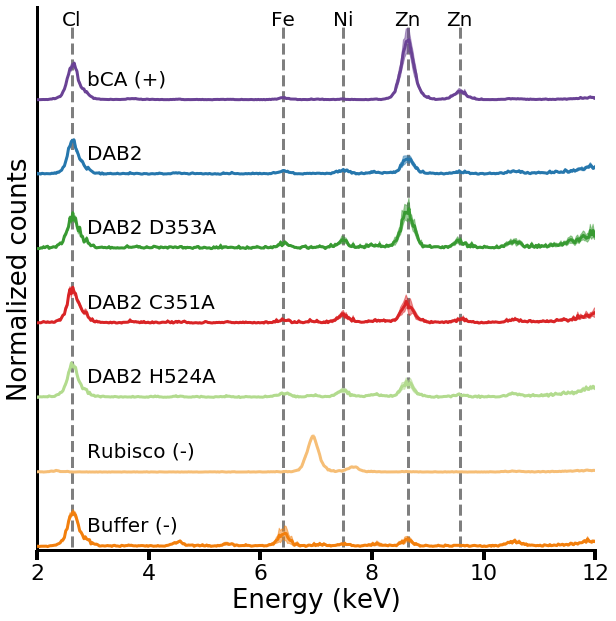

In [34]:
fig,ax = plt.subplots(figsize=(10,10))

fontsize=20

data_df = pd.DataFrame(columns=['x'],dtype='float')

for i, name in enumerate(nameorder):
    for fname in names2traces[name]:
        full_fname = fileLoc + fname
    
        x,y=getExcitationScan(full_fname)
        if name == 'Rubisco (-)':
            y=y/max(y[(x>6000) & (x<8500)])
        else:
            y=y/max(y[(x>2000) & (x<3500)])
        temp_df = pd.DataFrame(columns=['x',fname],dtype='float')
        temp_df['x'] = x
        temp_df[fname] = y
        temp_df.loc[-1] = ['name', name]
        data_df = data_df.merge(temp_df, on='x',how='outer')
    
    
data_df = data_df.set_index('x').transpose()
for column in data_df:
    if column != 'name':
        data_df[column] = data_df[column].astype(float)
        
error_df = data_df.groupby('name',axis=0).sem().transpose()[nameorder]
data_df = data_df.groupby('name',axis=0).mean().transpose()[nameorder]

#     return(data_df)
x=data_df.index
for i, col in enumerate(data_df.columns):
    y = data_df[col]+i*2
    err = error_df[col]
    name = data_df[col].name
    c = names2colors[name]
    ax.plot(x, y, zorder=5, lw=3, color=c)
    plt.fill_between(x.astype('float'), y - err, y + err,color=c, alpha=0.5)
    plt.text(2900,(i*2)+0.3,col,ha='left',va='bottom',fontsize=fontsize)

top=len(data_df.columns)*2+0.5
plt.xlim(2000,12000)
locs,labels = plt.xticks()
ticks=[str(int(x/1000)) for x in locs]
plt.xticks(locs, ticks, fontsize=22)
plt.ylim(-0.1,top)


#     plt.vlines([2622.39,2815.6,7478.15,8638.86,9572.0],0,6,zorder=0 ,alpha=0.5)
plt.vlines([2622.39,6403.84,7478.15,8638.86,9572.0],0,top-0.5,zorder=0 ,alpha=0.5,linestyles='--',lw=3)
#     plt.text(2622.39,top-0.6,'Cl Ka1',ha='center',va='bottom')
#     plt.text(7478.15,top-0.6,'Ni Ka1',ha='center',va='bottom')
#     plt.text(8638.86,top-0.6,'Zn Ka1',ha='center',va='bottom')
#     plt.text(9572.0,top-0.6,'Zn Kb1',ha='center',va='bottom')
#     plt.text(6403.84,top-0.6,'Fe Ka1',ha='center',va='bottom')
plt.text(2622.39,top-0.6,'Cl',ha='center',va='bottom',fontsize=fontsize)
plt.text(7478.15,top-0.6,'Ni',ha='center',va='bottom',fontsize=fontsize)
plt.text(8638.86,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(9572.0,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(6403.84,top-0.6,'Fe',ha='center',va='bottom',fontsize=fontsize)
#     plt.legend(loc=[1.05,0.4])
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized counts')
plt.yticks([])
# plt.xticks(rotation=45)

plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
    
plt.savefig('fig4/fig4D_averaged.svg', format='svg', bbox_inches='tight')

plt.show()

In [35]:
fileLoc = '../data/zincBindingFilesForPaper/total/'
files = os.listdir(fileLoc)
names2traces = {
    'bCA (+)': [x for x in files if ('BCA_acet_001.bip' in x)],
    'Buffer (-)': [x for x in files if ('cys_acet_LoopOnly_004.bip' in x) ],
    'Rubisco (-)': [x for x in files if 'luke_rubisco_cobalt_crystal.bip' in x ],
    'DAB2': [x for x in files if 'DAB2_acetone_3.bip' in x ],
#     'DAB2': [x for x in files if ('Acetone_DAB2_se' in x)|('DAB2_acetone_3' in x) ],
    'DAB2 C351A': [x for x in files if 'cys_acet_003.bip' in x ],
    'DAB2 D353A': [x for x in files if 'DAB2_DD_strep_acetone_2.bip' in x],
    'DAB2 H524A': [x for x in files if 'his_acet_001.bip' in x ],
}

# names2colors = {key:qual_palette[i%len(qual_palette)] for i,key in enumerate(names2traces.keys())}

names2colors = {
    'bCA (+)': qual_palette[9],
    'Buffer (-)': qual_palette[7],
    'Rubisco (-)': qual_palette[6],
    'DAB2': qual_palette[1], 
    'DAB2 C351A': qual_palette[5],
    'DAB2 D353A': qual_palette[3], 
    'DAB2 H524A': qual_palette[2],
}

nameorder = ['Buffer (-)','Rubisco (-)','DAB2 H524A','DAB2 C351A', 'DAB2 D353A', 'DAB2', 'bCA (+)']
['%s: %s'%(k, len(names2traces[k])) for k in names2traces.keys()]

['bCA (+): 1',
 'Buffer (-): 1',
 'Rubisco (-): 1',
 'DAB2: 1',
 'DAB2 C351A: 1',
 'DAB2 D353A: 1',
 'DAB2 H524A: 1']

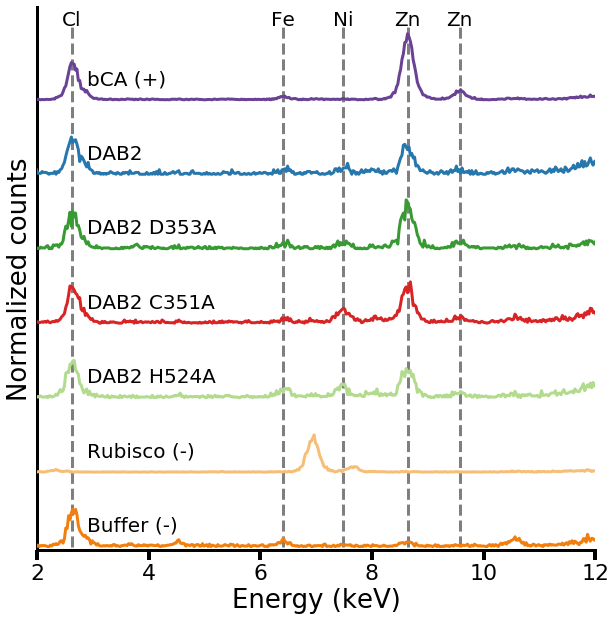

In [36]:
fig,ax = plt.subplots(figsize=(10,10))

fontsize=20

data_df = pd.DataFrame(columns=['x'],dtype='float')

for i, name in enumerate(nameorder):
    full_fname = fileLoc + names2traces[name][0]

    x,y=getExcitationScan(full_fname)
    if name == 'Rubisco (-)':
        y=y/max(y[(x>6000) & (x<8500)])
    else:
        y=y/max(y[(x>2000) & (x<3500)])
    temp_df = pd.DataFrame(columns=['x',name],dtype='float')
    temp_df['x'] = x
    temp_df[name] = y
    temp_df.loc[-1] = ['name', name]
    data_df = data_df.merge(temp_df, on='x',how='outer')
    
    
data_df = data_df.set_index('x').transpose()
for column in data_df:
    if column != 'name':
        data_df[column] = data_df[column].astype(float)
        
data_df=data_df.drop('name',axis=1).T
# error_df = data_df.groupby('name',axis=0).sem().transpose()[nameorder]
# data_df = data_df.groupby('name',axis=0).mean().transpose()[nameorder]

#     return(data_df)
x=data_df.index
for i, col in enumerate(data_df.columns):
#     print(col)
#     print(data_df[col])
    y = data_df[col]+i*2
    name = col
    c = names2colors[name]
    ax.plot(x, y, zorder=5, lw=3, color=c)
    plt.text(2900,(i*2)+0.3,col,ha='left',va='bottom',fontsize=fontsize)

top=len(data_df.columns)*2+0.5
plt.xlim(2000,12000)
locs,labels = plt.xticks()
ticks=[str(int(x/1000)) for x in locs]
plt.xticks(locs, ticks, fontsize=22)
plt.ylim(-0.1,top)


#     plt.vlines([2622.39,2815.6,7478.15,8638.86,9572.0],0,6,zorder=0 ,alpha=0.5)
plt.vlines([2622.39,6403.84,7478.15,8638.86,9572.0],0,top-0.5,zorder=0 ,alpha=0.5,linestyles='--',lw=3)
#     plt.text(2622.39,top-0.6,'Cl Ka1',ha='center',va='bottom')
#     plt.text(7478.15,top-0.6,'Ni Ka1',ha='center',va='bottom')
#     plt.text(8638.86,top-0.6,'Zn Ka1',ha='center',va='bottom')
#     plt.text(9572.0,top-0.6,'Zn Kb1',ha='center',va='bottom')
#     plt.text(6403.84,top-0.6,'Fe Ka1',ha='center',va='bottom')
plt.text(2622.39,top-0.6,'Cl',ha='center',va='bottom',fontsize=fontsize)
plt.text(7478.15,top-0.6,'Ni',ha='center',va='bottom',fontsize=fontsize)
plt.text(8638.86,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(9572.0,top-0.6,'Zn',ha='center',va='bottom',fontsize=fontsize)
plt.text(6403.84,top-0.6,'Fe',ha='center',va='bottom',fontsize=fontsize)
#     plt.legend(loc=[1.05,0.4])
plt.xlabel('Energy (keV)')
plt.ylabel('Normalized counts')
plt.yticks([])
# plt.xticks(rotation=45)

plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
    
plt.savefig('fig4/fig4D_representitive.svg', format='svg', bbox_inches='tight')

plt.show()

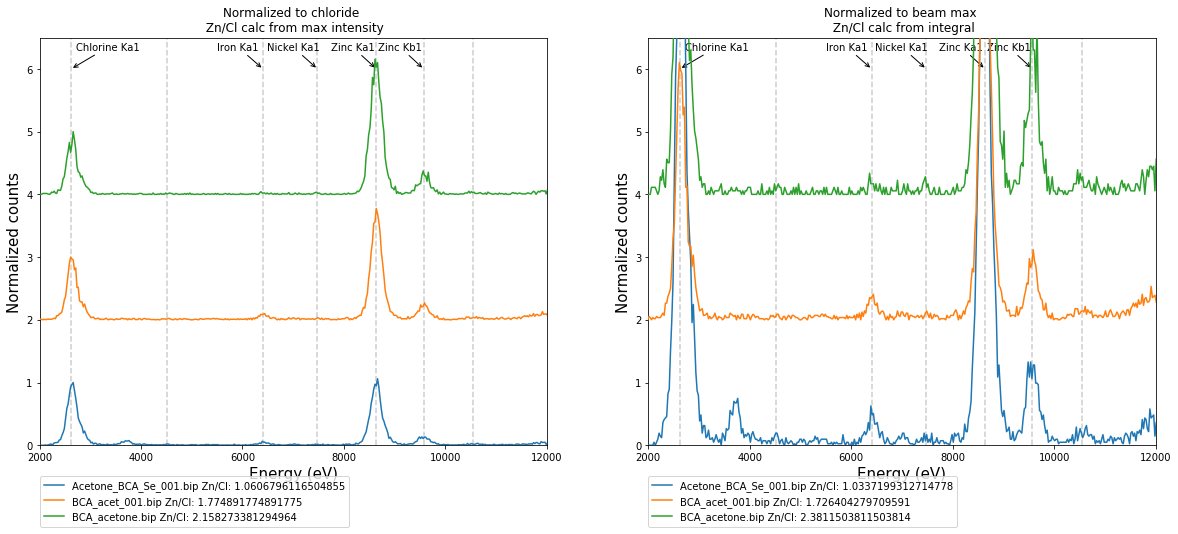

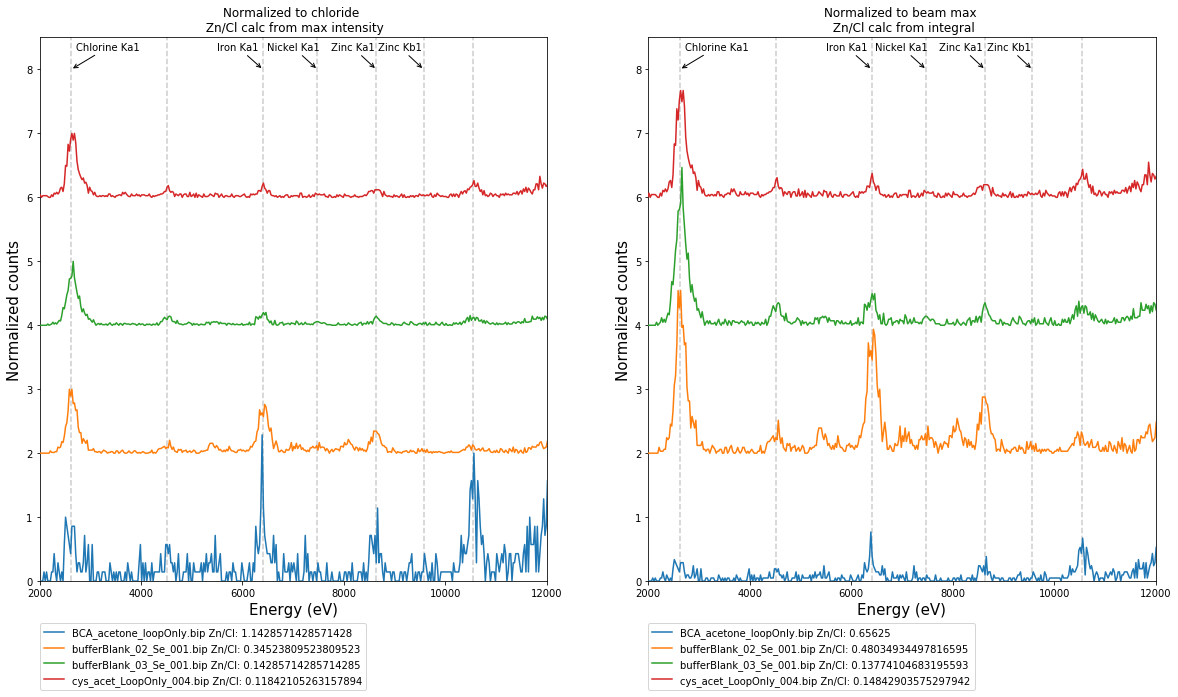

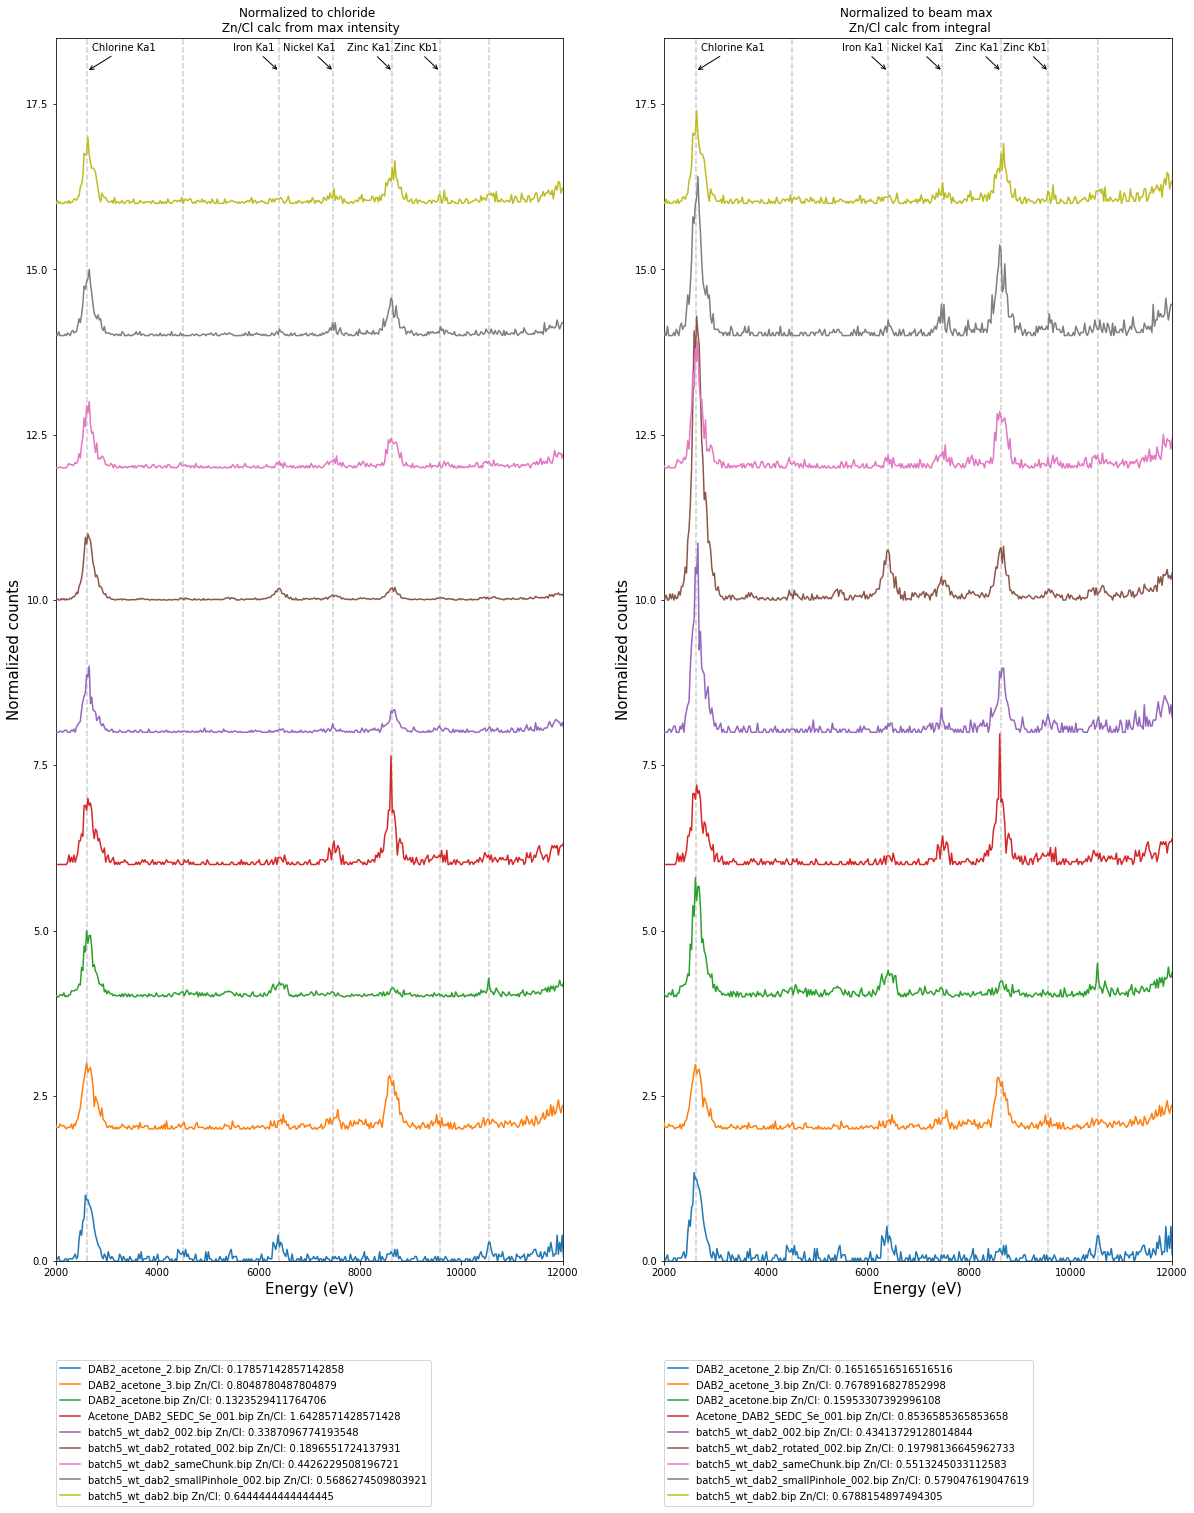

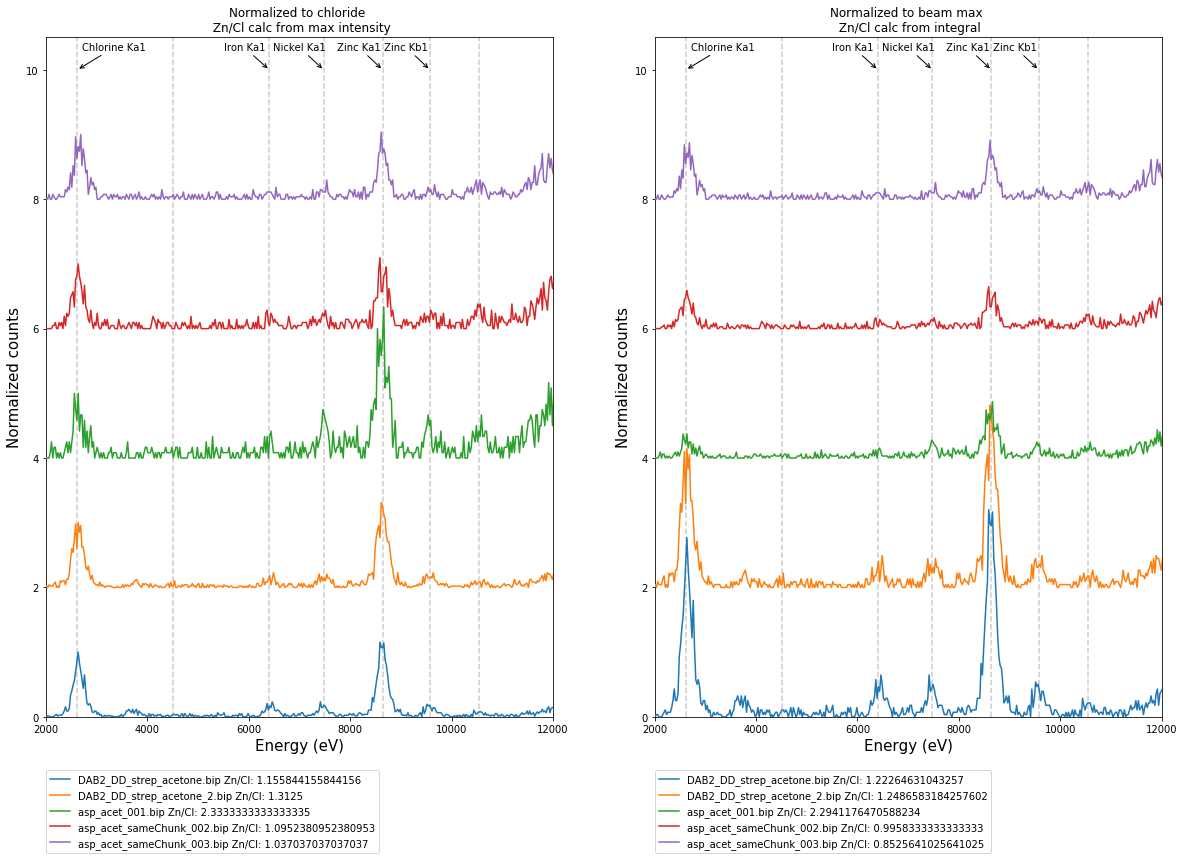

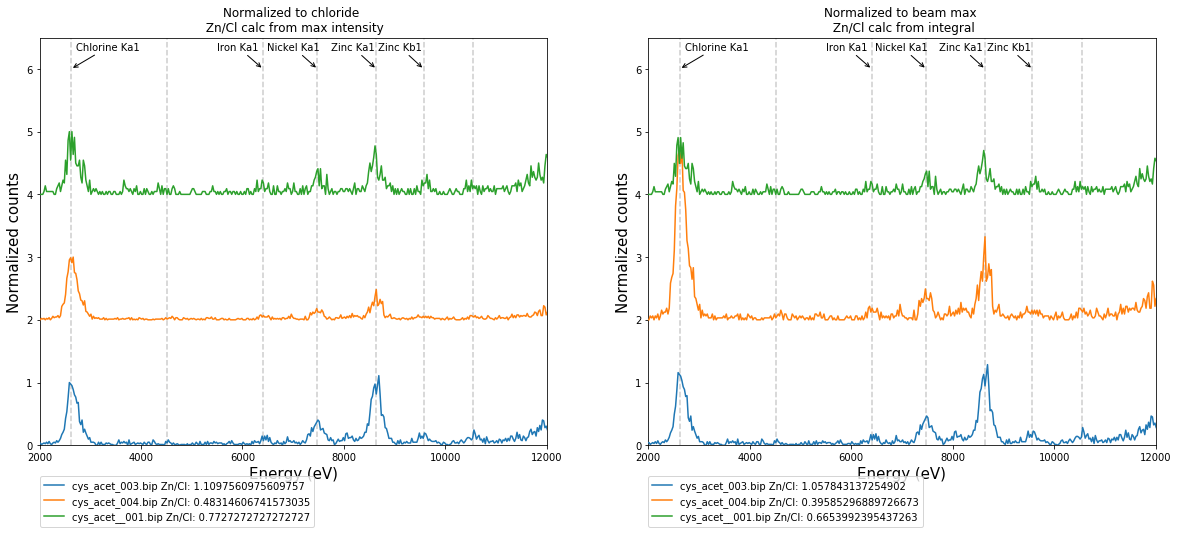

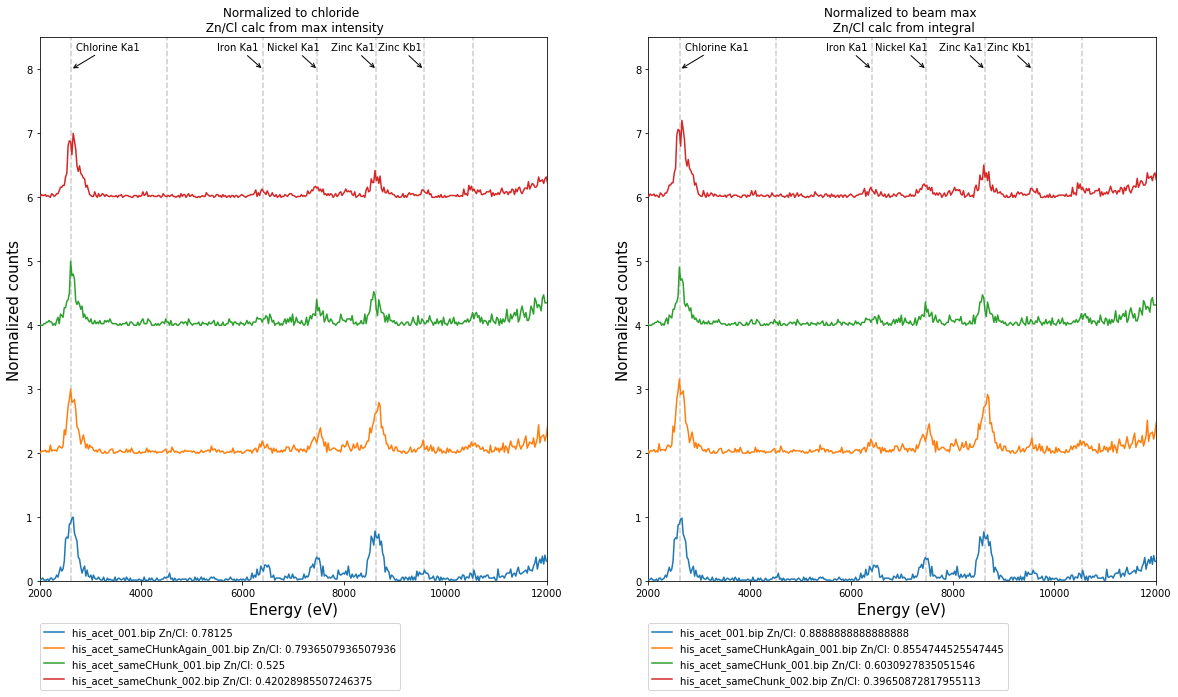

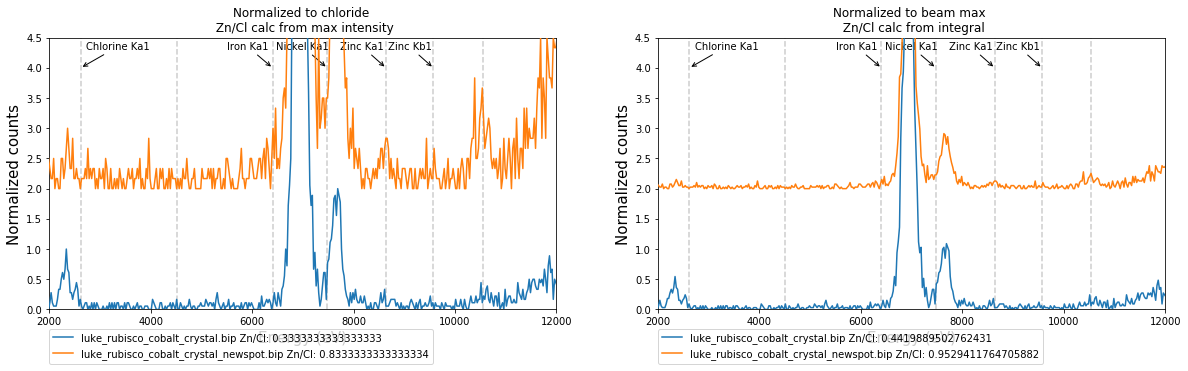

In [16]:
fileLoc = '/Volumes/Shared/data/Jack/DabTransporterPaper/data/zincBindingFilesForPaper/total/'
BCA = [
    ('Acetone_BCA_Se_001.bip', 'Acetone_BCA_Se_001.bip'),
    ('BCA_acet_001.bip', 'BCA_acet_001.bip'),
    ('BCA_acetone.bip', 'BCA_acetone.bip'),
      ]
Blank = [
    ('BCA_acetone_loopOnly.bip', 'BCA_acetone_loopOnly.bip'),
    ('bufferBlank_02_Se_001.bip', 'bufferBlank_02_Se_001.bip'),
     ('bufferBlank_03_Se_001.bip', 'bufferBlank_03_Se_001.bip'),
    ('cys_acet_LoopOnly_004.bip', 'cys_acet_LoopOnly_004.bip'),
        ]
DD = [
    ('DAB2_DD_strep_acetone.bip', 'DAB2_DD_strep_acetone.bip'),
     ('DAB2_DD_strep_acetone_2.bip', 'DAB2_DD_strep_acetone_2.bip'),
    ('asp_acet_001.bip', 'asp_acet_001.bip'),
     ('asp_acet_sameChunk_002.bip', 'asp_acet_sameChunk_002.bip'),
     ('asp_acet_sameChunk_003.bip', 'asp_acet_sameChunk_003.bip'),
]
wt=[
    ('DAB2_acetone_2.bip', 'DAB2_acetone_2.bip'), #day2
    ('DAB2_acetone_3.bip', 'DAB2_acetone_3.bip'), #day2
    ('DAB2_acetone.bip', 'DAB2_acetone.bip'), #day2
    ('Acetone_DAB2_SEDC_Se_001.bip', 'Acetone_DAB2_SEDC_Se_001.bip'), #day1
    ('batch5_wt_dab2_002.bip', 'batch5_wt_dab2_002.bip'), #day3
    ('batch5_wt_dab2_rotated_002.bip', 'batch5_wt_dab2_rotated_002.bip'), #day3
    ('batch5_wt_dab2_sameChunk.bip', 'batch5_wt_dab2_sameChunk.bip'), #day3
    ('batch5_wt_dab2_smallPinhole_002.bip', #day3
    'batch5_wt_dab2_smallPinhole_002.bip'), #day3
    ('batch5_wt_dab2.bip', 'batch5_wt_dab2.bip'), #day3
]
DC=[
    ('cys_acet_003.bip', 'cys_acet_003.bip'),
     ('cys_acet_004.bip', 'cys_acet_004.bip'),
    ('cys_acet__001.bip', 'cys_acet__001.bip'),
]
DH = [
    ('his_acet_001.bip', 'his_acet_001.bip'),
     ('his_acet_sameCHunkAgain_001.bip', 'his_acet_sameCHunkAgain_001.bip'),
     ('his_acet_sameCHunk_001.bip', 'his_acet_sameCHunk_001.bip'),
     ('his_acet_sameChunk_002.bip', 'his_acet_sameChunk_002.bip'),
]
RUB = [
    ('luke_rubisco_cobalt_crystal.bip', 'luke_rubisco_cobalt_crystal.bip'),
     ('luke_rubisco_cobalt_crystal_newspot.bip','luke_rubisco_cobalt_crystal_newspot.bip')
]
plots =[ 
    BCA, Blank, wt, DD, DC, DH, RUB
     ]
for toPlot in plots:
    fig,axs = plt.subplots(nrows=1,ncols=2,figsize=(20,(10/4)*len(toPlot)))
    ax=axs[0]
    for i, file in enumerate(toPlot):

        x,y=getExcitationScan(fileLoc+file[0])

        chlorine = max(y[(x>2000) & (x<3500)])
        zinc = max(y[(x>8000) & (x<10000)])
        zincToChlorine = zinc/chlorine

        label = file[1] +' Zn/Cl: '+str(zincToChlorine)

        y=y/max(y[(x>2000) & (x<3500)])+i*2
        ax.plot(x,y,label=label,zorder=5)

    top=len(toPlot)*2+0.5
    ax.set_xlim(2000,12000)
    ax.set_ylim(0,top)


    ax.vlines([2622.39,6403.84,4510.84,7478.15,8638.86,9572.0,10543.72],0,top,zorder=0 ,alpha=0.2,linestyles='--')
    ax.annotate('Chlorine Ka1',[2622.39,top-0.5],[2722.39,top-0.2],arrowprops={'arrowstyle':'->'})
    ax.annotate('Nickel Ka1',[7478.15,top-0.5],[6478.15,top-0.2],arrowprops={'arrowstyle':'->'})
    ax.annotate('Zinc Ka1',[8638.86,top-0.5],[7738.86,top-0.2],arrowprops={'arrowstyle':'->'})
    ax.annotate('Zinc Kb1',[9572.0,top-0.5],[8672.0,top-0.2],arrowprops={'arrowstyle':'->'})
    ax.annotate('Iron Ka1',[6403.84,top-0.5],[5503.84,top-0.2],arrowprops={'arrowstyle':'->'})
    ax.legend(loc=[0,-.2])
    ax.set_xlabel('Energy (eV)',fontsize=15)
    ax.set_ylabel('Normalized counts',fontsize=15)
    ax.set_title('Normalized to chloride \n Zn/Cl calc from max intensity')
    
    ax=axs[1]
    for i, file in enumerate(toPlot):

        x,y=getExcitationScan(fileLoc+file[0])

        chlorine = sum(y[(x>2000) & (x<3500)])
        zinc = sum(y[(x>8000) & (x<9000)])
        zincToChlorine = zinc/chlorine

        label = file[1] +' Zn/Cl: '+str(zincToChlorine)

        y=y/max(y)*50+i*2
        ax.plot(x,y,label=label,zorder=5)

    top=len(toPlot)*2+0.5
    ax.set_xlim(2000,12000)
    ax.set_ylim(0,top)


    ax.vlines([2622.39,6403.84,4510.84,7478.15,8638.86,9572.0,10543.72],0,top,zorder=0 ,alpha=0.2,linestyles='--')
    ax.annotate('Chlorine Ka1',[2622.39,top-0.5],[2722.39,top-0.2],arrowprops={'arrowstyle':'->'})
    ax.annotate('Nickel Ka1',[7478.15,top-0.5],[6478.15,top-0.2],arrowprops={'arrowstyle':'->'})
    ax.annotate('Zinc Ka1',[8638.86,top-0.5],[7738.86,top-0.2],arrowprops={'arrowstyle':'->'})
    ax.annotate('Zinc Kb1',[9572.0,top-0.5],[8672.0,top-0.2],arrowprops={'arrowstyle':'->'})
    ax.annotate('Iron Ka1',[6403.84,top-0.5],[5503.84,top-0.2],arrowprops={'arrowstyle':'->'})
    ax.legend(loc=[0,-.2])
    ax.set_xlabel('Energy (eV)',fontsize=15)
    ax.set_ylabel('Normalized counts',fontsize=15)
    ax.set_title('Normalized to beam max \n Zn/Cl calc from integral')

    
plt.show()

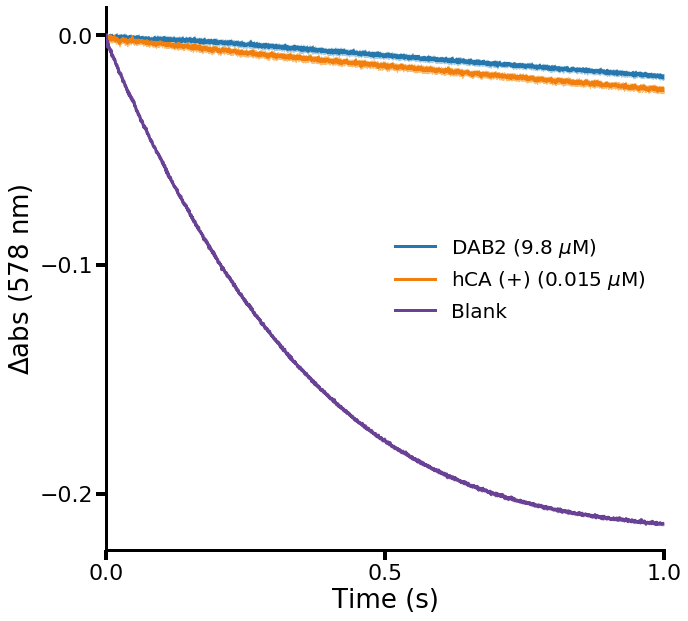

In [44]:
fig,ax = plt.subplots(figsize=(10,10))

dab_data = pd.read_excel('../data/stopFlow/DAB2_SF_all_1s.xlsx',sheet_name='dab').set_index('Time')
blank_data = pd.read_excel('../data/stopFlow/DAB2_SF_all_1s.xlsx',sheet_name='blank').set_index('Time')
ca_data = pd.read_excel('../data/stopFlow/DAB2_SF_all_1s.xlsx',sheet_name='CA').set_index('Time')

dfs=[dab_data,blank_data,ca_data]

colors = [qual_palette[1], qual_palette[7],qual_palette[9],qual_palette[0], qual_palette[6],qual_palette[8],]
labels = ['DAB2 (9.8 $\mu$M)', 'hCA (+) (0.015 $\mu$M)', 'Blank']

for i,df in enumerate(dfs):
    x=df.index.astype('float')
    y=df.mean(axis=1)-df.mean(axis=1).iloc[0]
    err = df.sem(axis=1)
    c=colors[i]
    c2=colors[i+3]
    ax.plot(x, y, zorder=5, lw=3, color=c,label=labels[i])
    ax.fill_between(x.astype('float'), y - err, y + err,color=c2)
    
plt.legend(loc=7,fontsize=20,frameon=False)
plt.xlabel('Time (s)')
plt.ylabel('$\Delta$abs (578 nm)')
# locs,labels = plt.yticks()
# ticks=[str(int(x/1000)) for x in locs]
plt.yticks([0, -0.1, -0.2], fontsize=22)
plt.xticks([0, 0.5, 1], fontsize=22)
plt.xlim(0,1)


# plt.xticks(rotation=45)

plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
    
plt.savefig('fig4/fig4F.eps', format='eps', bbox_inches='tight')

plt.show()


/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/usr/local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is dep

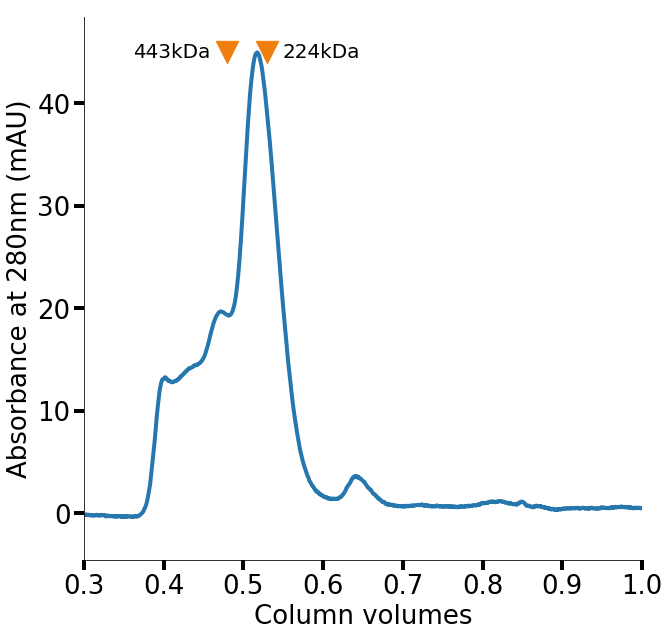

In [13]:
fig,ax = plt.subplots(figsize=(10,10))
s200=pd.read_csv('../data/DAB2-Batch5/18Sept27_DABS200/18Sept27_DAB_S200Inrease_Cleaned.csv')
cv = s200['UV 1_280_ml']/2.4
plt.plot(cv,s200['UV 1_280_mAU'],label='UV 280', color=qual_palette[1],lw=4)
#     plt.plot(s200['UV 2_485_ml'],s200['UV 2_485_mAU'],label='UV 485')
plt.xlim(0,max(cv))
plt.ylabel('Absorbance at 280nm (mAU)',fontsize=26)
plt.xlabel('Column volumes',fontsize=26)
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)
plt.xlim(0.3,1)
plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=4)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

peak=s200['UV 1_280_ml'][s200['UV 1_280_mAU']==max(s200['UV 1_280_mAU'])].iloc[0]/2.4
bX=1.15/2.4
bY=443
lX=1.27/2.4
lY=224
slope=(lY-bY)/(lX-bX)
kDa = bY+slope*(peak-bX)
peak_height = s200[s200['UV 1_280_ml']==peak*2.4]['UV 1_280_mAU'].iloc[0]
plt.scatter([bX,lX],[peak_height]*2,s = 500,marker='v',color=qual_palette[7])

offset = 0.02
plt.text(bX-offset,peak_height,'%dkDa'%bY,ha='right',va='center',fontsize=fontsize)
plt.text(lX+offset,peak_height,'%dkDa'%lY,ha='left',va='center',fontsize=fontsize)


# plt.axvline(peak,label=kDa,c='g')

# plt.axvline(bX,label=bY,c='r')
# plt.axvline(lX,label=lY,c='k')

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# plt.ylim(-0.5,50)

# plt.legend()
    
plt.savefig('fig4/fig4PanelS3.eps',
           format='eps',bbox_inches='tight')
plt.show()

../data/tecantaloupe/growth/plate_time_course_parser.py:80: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  return clipped_df.convert_objects(convert_numeric=True)
/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


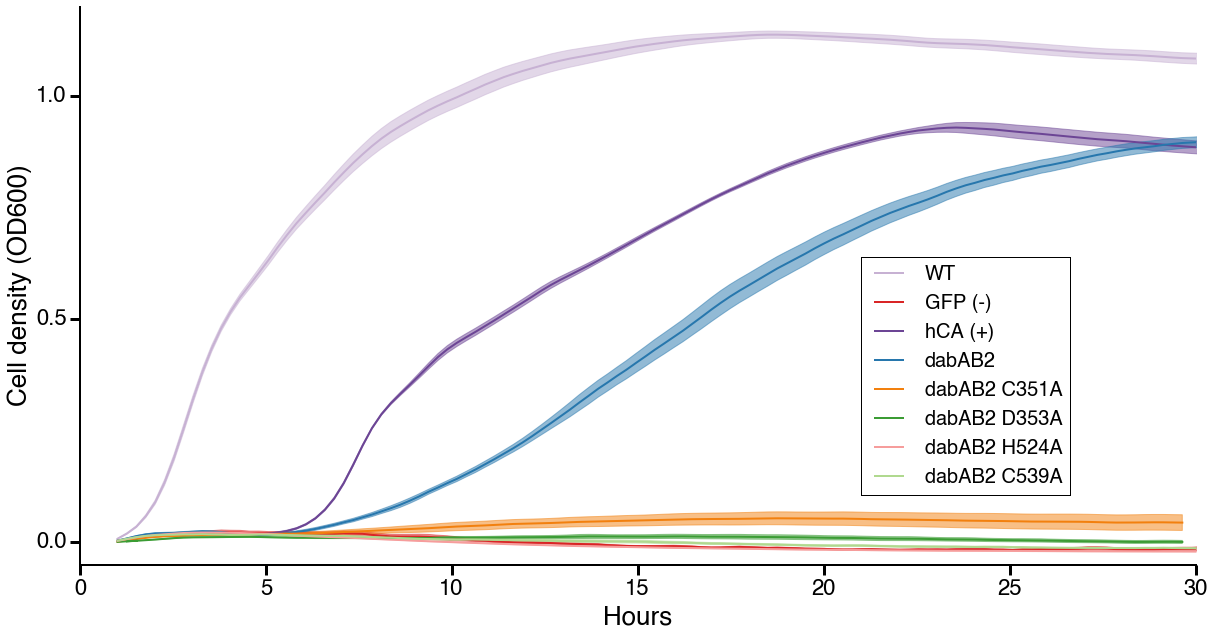

In [10]:
fig,ax = plt.subplots(figsize=(20,10))

# PlateSpec defined in CSV for easy editing
ps = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_02_07_operon1CAFreeKnockInGrowth_metalKO_nice.csv')
parser = SavageLabM1000Excel()
timecourse1 = parser.ParseFromFilename('../data/tecantaloupe/growth/data/2018_02_09_CAFree_operon1_rescue_experiment_metal_KO_later.xlsx')
blanked1 = timecourse1.blank(n_skip=0,n_av=3)
smoothed1 = blanked1.smooth()

means1 = smoothed1.mean_by_name(ps)
sems1 = smoothed1.sem_by_name(ps)

mean_OD1 = means1.data_for_label('abs600')
sems_OD1 = sems1.data_for_label('abs600')


#     print(normalized_mean_yld)

ps2 = PlateSpec.FromFile('../data/tecantaloupe/growth/plate_specs/2018_03_23_operon1CAFreeKnockInGrowth_metalandproton_nice.csv')
parser2 = SavageLabM1000Excel()
timecourse2 = parser2.ParseFromFilename('../data/tecantaloupe/growth/data/2018_03_24_CAFree_DAB2_protonWire.xlsx')
blanked2 = timecourse2.blank(n_skip=0,n_av=3)
smoothed2 = blanked2.smooth()

means2 = smoothed2.mean_by_name(ps2)
sems2 = smoothed2.sem_by_name(ps2)

mean_OD2 = means2.data_for_label('abs600')
sems_OD2 = sems2.data_for_label('abs600')

mean_OD = mean_OD1.merge(mean_OD2,on='time_s',how='outer')
sems_OD = sems_OD1.merge(sems_OD2,on='time_s',how='outer')

time_h = mean_OD.time_s / (60.0*60.0)



#     print(data)
to_plot = [
    ('bw+pFE-sfGFP_x', 'WT'),
#     ('bw+pFE-sfGFP_y', 'WT2'),
    ('CAF+pFE-sfGFP_x', 'GFP (-)'),
    ('CAF+pFE-HCA2', 'hCA (+)'),
    ('CAF+pFE-DAB2_wt_x', 'dabAB2'),
    ('CAF+pFE-DC351', 'dabAB2 C351A'),
    ('CAF+pFE-DD353', 'dabAB2 D353A'),
    ('CAF+pFE-DAB2+dHis1', 'dabAB2 H524A'),
    ('CAF+pFE-DAB2+dCys1', 'dabAB2 C539A'),
]

colors = {
    'WT':qual_palette[8],
#     'WT2':qual_palette[8],
    'GFP (-)':qual_palette[5],
    'hCA (+)':qual_palette[9],
    'dabAB2':qual_palette[1],
    'dabAB2 C351A':qual_palette[7],
    'dabAB2 D353A':qual_palette[3],
    'dabAB2 H524A':qual_palette[4],
    'dabAB2 C539A':qual_palette[2],
}


labels = [name for label, name in to_plot]

for i, tp in enumerate(to_plot):
    c,label = tp
    color = colors[label]
    plt.fill_between(time_h, mean_OD[c] - sems_OD[c], mean_OD[c] + sems_OD[c],
                     color=color, alpha=0.5)
    plt.plot(time_h, mean_OD[c], label=label, color=color, lw=2)
    
plt.xlim(0,30)

plt.ylabel('Cell density (OD600)', fontsize=26)
plt.xlabel('Hours', fontsize=26)

plt.tick_params(axis='both', direction='out', bottom='on', left='on', top='off', right='off',
                length=10, width=3)
plt.yticks([0, 0.5, 1.0], fontsize=22)
plt.xticks(fontsize=22)

plt.ylim(-0.05, 1.2)
    # Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

#     change axis weight
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
plt.legend(loc=[0.7,0.125],fontsize=20)



plt.savefig('figS2/figS2B.eps',format='eps',bbox_inches='tight')
plt.savefig('figS2/figS2B.svg',format='svg',bbox_inches='tight')
plt.show()